In [1]:
import os
import tifffile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

340
/mnt/LSDF/projects/code-vita/Medaka/2018_11/Medaka_595_59-2/scaled_0.5_8bit_cropped_slices.tif
/mnt/LSDF/projects/code-vita/Medaka/2018_11/Medaka_595_59-2/brain_scaled_0.5_8bit_cropped_slices.tif
(2112, 512, 560)
(2112, 512, 560)
[0 0 0]


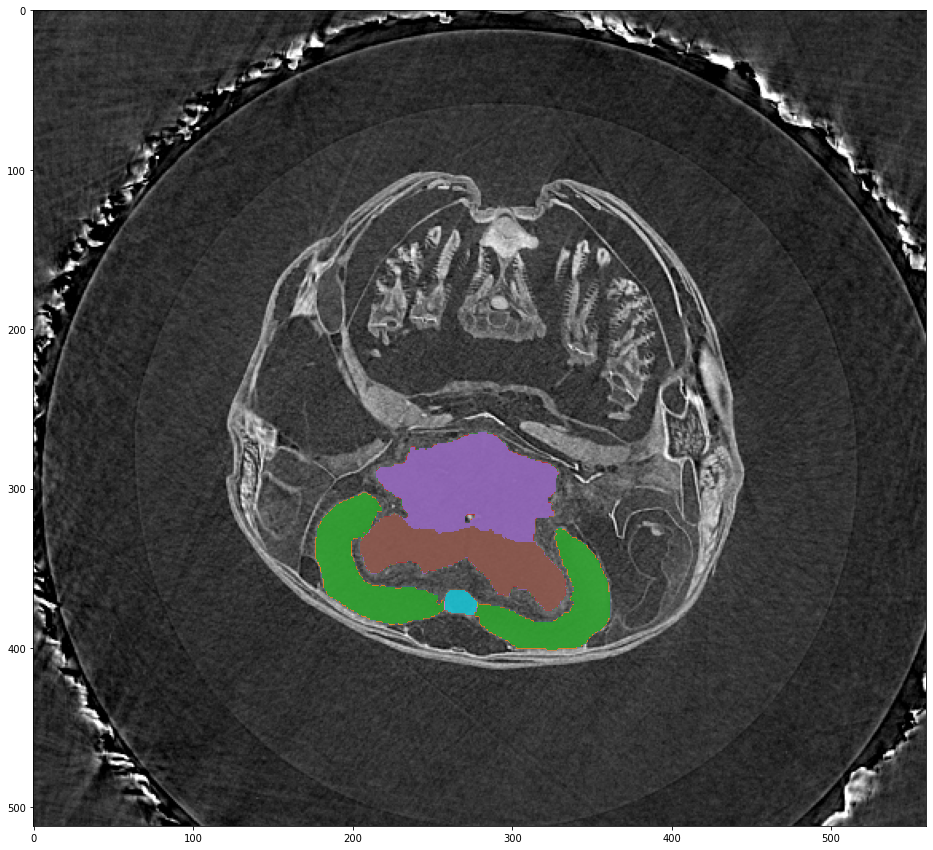

In [12]:
img_addrs = glob('/mnt/LSDF/projects/code-vita/Medaka/2018_11/*/scaled_0.5_8bit_cropped_slices.tif')

print(len(img_addrs))
img_addr = img_addrs[300]  # addr to view
img = tifffile.imread(img_addr)

dirname, filename = os.path.split(img_addr)
res_addr = dirname + '/brain_' + filename
print(img_addr)
print(res_addr )
msk = tifffile.imread(res_addr)

print(img.shape)
print(msk.shape)
#print(np.unique(msk))

ne_slc = np.where(msk.sum((1, 2))>0)[0]
#print(ne_slc)
slice_id = ne_slc[len(ne_slc)//2]
#slice_id = ne_slc[-1]

print(np.array(msk.shape) - np.array(img.shape))

plt.figure(figsize=(16, 16))
plt.imshow(img[slice_id], cmap='gray')
plt.imshow(msk[slice_id], cmap='tab10', alpha=(msk[slice_id]>0)*0.9)
plt.show()